In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('../server_run/1d_fixed_beta/results.csv')
df.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_mm_est_bias,robust_mm_est_variance,robust_s_est_bias,robust_s_est_variance,ols_est_bias,ols_est_variance,ols_diag_est_bias,ols_diag_est_variance,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,0.0,0.1,-1.00,4,0.003144,0.022087,0.002657,0.022582,0.016592,0.068096,0.001491,0.021755,0.004492,0.029141,1.048331,1.049158,1.050255,1.131970,1.062975
1,0.0,0.1,-0.50,4,-0.010328,0.022608,-0.010435,0.022935,-0.006954,0.077742,-0.009867,0.020692,-0.013324,0.030633,1.029494,1.031633,1.031591,1.130002,1.043304
2,0.0,0.1,-0.25,4,0.000606,0.020377,0.002880,0.020623,-0.005695,0.061071,-0.001556,0.018833,0.003689,0.025431,1.053532,1.056267,1.056814,1.135479,1.067367
3,0.0,0.1,-0.10,4,-0.008525,0.021198,-0.006985,0.021555,0.011462,0.070460,-0.007081,0.020837,-0.006058,0.028688,1.017388,1.017620,1.017224,1.110117,1.026251
4,0.0,0.1,0.00,4,-0.007325,0.018007,-0.007325,0.018160,-0.021414,0.064672,-0.004107,0.017022,-0.008774,0.023984,1.024323,1.027897,1.027565,1.122531,1.032841


In [19]:
n_list = [50, 100, 200, 500, 1000]

df_len = len(df)
# df is missing the column n, first 7*5*9 rows are for n=50, next 7*5*9 rows are for n=100, etc.
df['n'] = np.repeat(n_list, df_len//len(n_list))
df.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_mm_est_bias,robust_mm_est_variance,robust_s_est_bias,robust_s_est_variance,ols_est_bias,ols_est_variance,ols_diag_est_bias,ols_diag_est_variance,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe,n
0,0.0,0.1,-1.00,4,0.003144,0.022087,0.002657,0.022582,0.016592,0.068096,0.001491,0.021755,0.004492,0.029141,1.048331,1.049158,1.050255,1.131970,1.062975,50
1,0.0,0.1,-0.50,4,-0.010328,0.022608,-0.010435,0.022935,-0.006954,0.077742,-0.009867,0.020692,-0.013324,0.030633,1.029494,1.031633,1.031591,1.130002,1.043304,50
2,0.0,0.1,-0.25,4,0.000606,0.020377,0.002880,0.020623,-0.005695,0.061071,-0.001556,0.018833,0.003689,0.025431,1.053532,1.056267,1.056814,1.135479,1.067367,50
3,0.0,0.1,-0.10,4,-0.008525,0.021198,-0.006985,0.021555,0.011462,0.070460,-0.007081,0.020837,-0.006058,0.028688,1.017388,1.017620,1.017224,1.110117,1.026251,50
4,0.0,0.1,0.00,4,-0.007325,0.018007,-0.007325,0.018160,-0.021414,0.064672,-0.004107,0.017022,-0.008774,0.023984,1.024323,1.027897,1.027565,1.122531,1.032841,50


In [20]:
df.columns

Index(['contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff',
       'robust_m_est_bias', 'robust_m_est_variance', 'robust_mm_est_bias',
       'robust_mm_est_variance', 'robust_s_est_bias', 'robust_s_est_variance',
       'ols_est_bias', 'ols_est_variance', 'ols_diag_est_bias',
       'ols_diag_est_variance', 'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe',
       'robust_s_mspe', 'ols_diag_mspe', 'n'],
      dtype='object')

In [38]:
feature_columns = ['n', 'contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']

In [ ]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,method,mpse
0,50,0.0,0.1,-1.00,4,ols,1.048331
1,50,0.0,0.1,-0.50,4,ols,1.029494
2,50,0.0,0.1,-0.25,4,ols,1.053532
3,50,0.0,0.1,-0.10,4,ols,1.017388
4,50,0.0,0.1,0.00,4,ols,1.024323


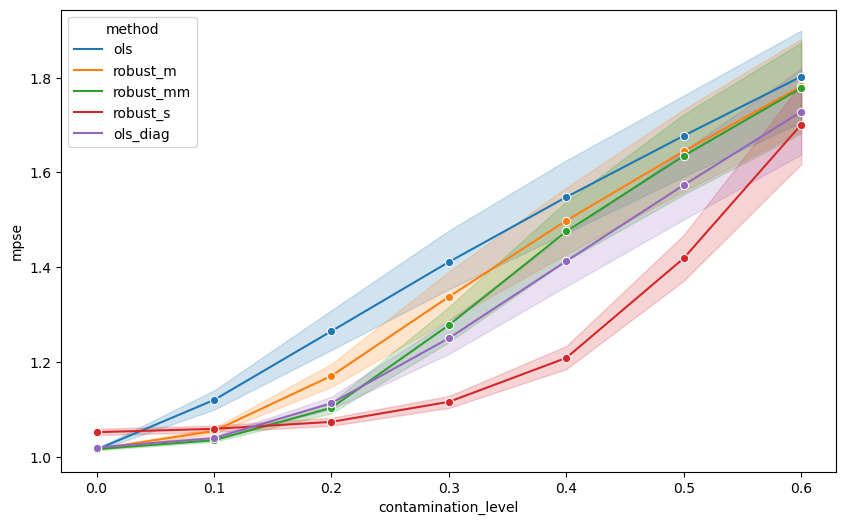

In [33]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='contamination_level', y='mpse', hue='method', marker='o', ax=ax)
plt.show()

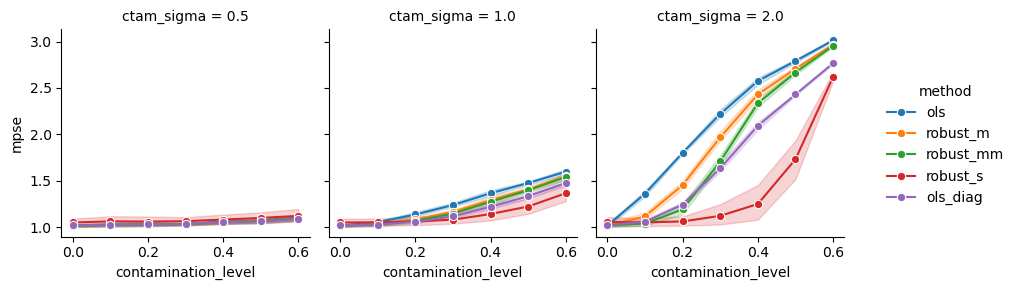

In [36]:
# Facet it by sigma, set mu = 0, sigma = 0.5, 1, 2
df_mpse_mu0_3sigma = df_mpse[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_mpse_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'mpse', marker='o')
g.add_legend()
plt.show()

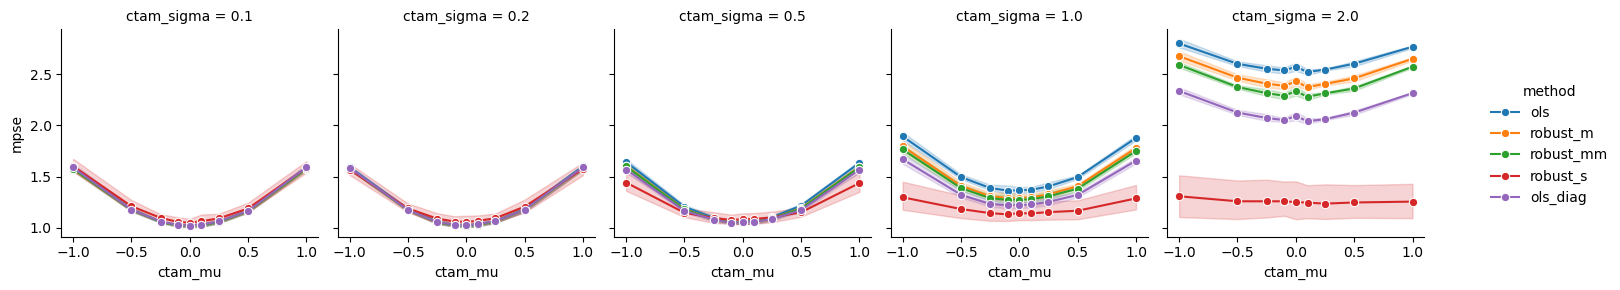

In [44]:
# fix contamination level = 0.4, check relationship between mpse and mu
df_mpse_contamination_04 = df_mpse[df_mpse['contamination_level'] == 0.4]
g = sns.FacetGrid(df_mpse_contamination_04, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'ctam_mu', 'mpse', marker='o')
g.add_legend()

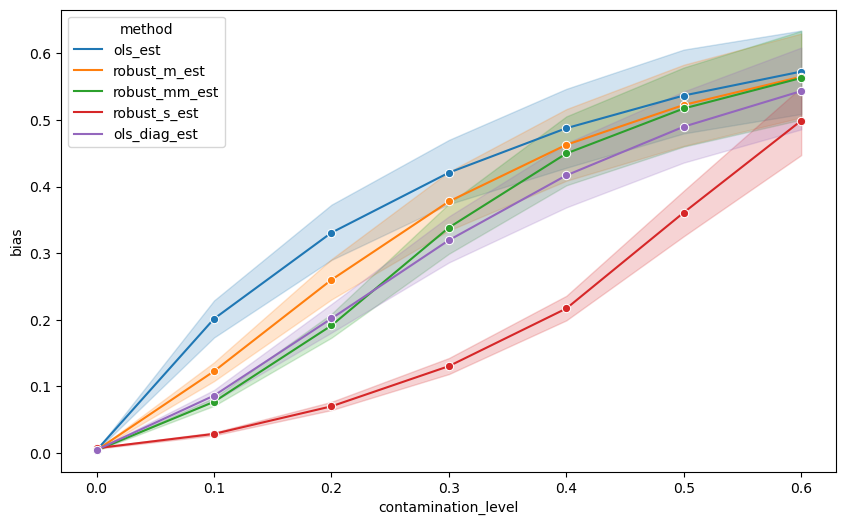

In [40]:
# bias
df_bias = df[feature_columns + bias_columns]
# set all bias to positive
df_bias[bias_columns] = df_bias[bias_columns].abs()
df_bias = df_bias.melt(id_vars=feature_columns, value_vars=bias_columns, var_name='method', value_name='bias')
df_bias['method'] = df_bias['method'].str.replace('_bias', '')
df_bias.head()

# plotting for bias
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_bias, x='contamination_level', y='bias', hue='method', marker='o', ax=ax)
plt.show()


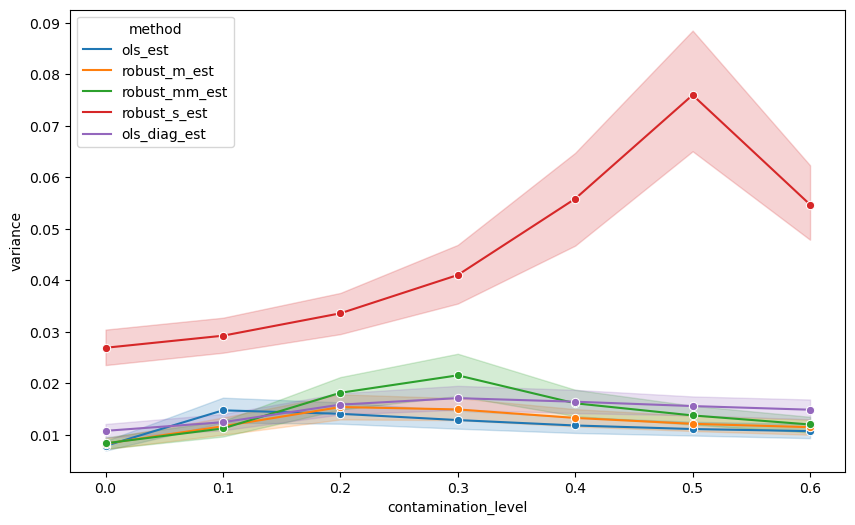

In [41]:
# variance
df_variance = df[feature_columns + variance_columns]
df_variance = df_variance.melt(id_vars=feature_columns, value_vars=variance_columns, var_name='method', value_name='variance')
df_variance['method'] = df_variance['method'].str.replace('_variance', '')
df_variance.head()

# plotting for variance
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_variance, x='contamination_level', y='variance', hue='method', marker='o', ax=ax)
plt.show()


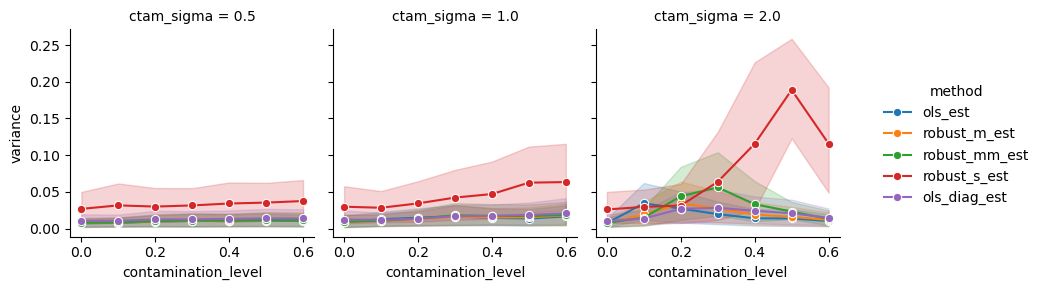

In [42]:
# facet by sigma, set mu = 0, sigma = 0.5, 1, 2
df_variance_mu0_3sigma = df_variance[(df_variance['ctam_mu'] == 0) & (df_variance['ctam_sigma'].isin([0.5, 1, 2]))]
g = sns.FacetGrid(df_variance_mu0_3sigma, col='ctam_sigma', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'variance', marker='o')
g.add_legend()

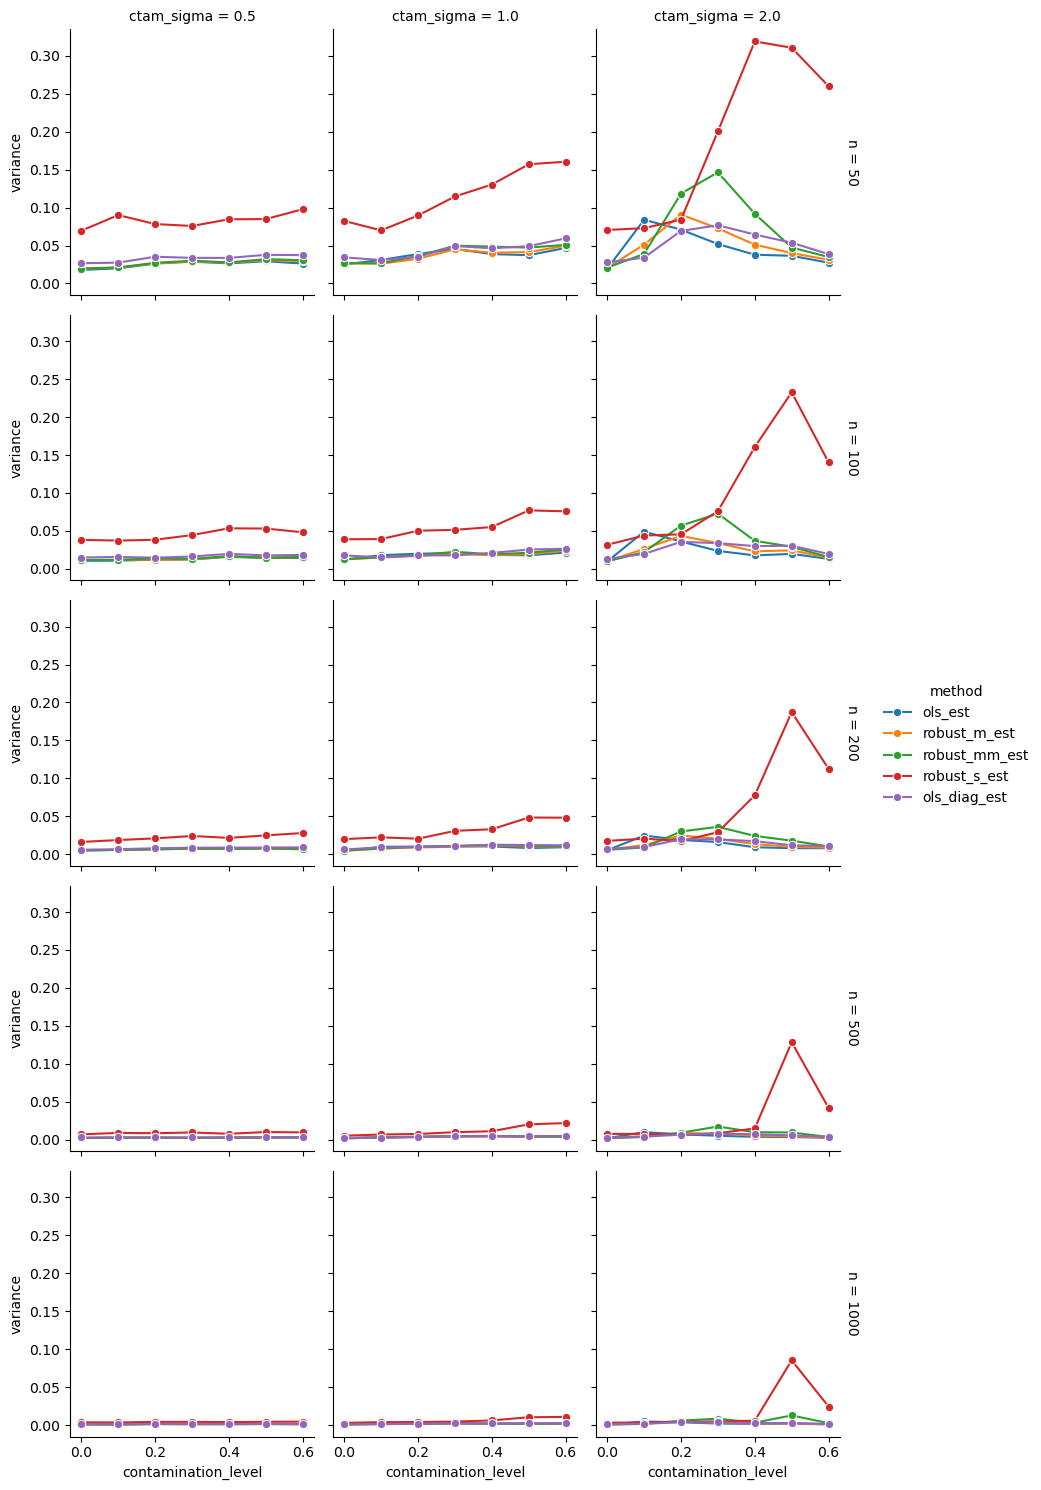

In [ ]:
# set row facet tp n
g = sns.FacetGrid(df_variance_mu0_3sigma, col='ctam_sigma', row='n', hue='method', margin_titles=True)
g.map(sns.lineplot, 'contamination_level', 'variance', marker='o')
g.add_legend()
plt.show()